In [1]:
from lblcrn.crn_sym import *
from lblcrn.experiments.simulate import simulate
from lblcrn.experiments.xps_io import read_exp

In [2]:
sm = SpeciesManager()

y1 = sm.sp('H2Og', Orbital('1s', 535.0))
x2 = sm.sp('H2O', Orbital('1s', 532.2))
x3 = sm.sp('OH', Orbital('1s', 530.9))
x4 = sm.sp('O', Orbital('1s', 530.0))
x53 = sm.sp('OH.H2O_hb', Orbital('1s', 531.6))
x54 = sm.sp('O.H2O_hb', Orbital('1s', 531.6))
x6 = sm.sp('multiH2O', Orbital('1s', 533.2))
x7 = sm.sp('O2g', Orbital('1s', 535.0))

rsys = RxnSystem(
    Rxn(x4 + y1, x54, 3.207654),
    Rxn(x3 + y1, x53, 1.363342),
    RevRxn(x54, x3 + x3, 6.220646,0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 1.939313),
    Rxn(y1, x2, 0.515646),
    Rxn(x53, y1 + x3, 0.733491),
    Rxn(x54, x4 + y1, 0.311754),
    Rxn(x53 + y1, x6, 1.038423),
    Rxn(x6, x53 + y1, 0.962999),
    RevRxn(x4 + x4, x7, 0.002342,426.922895),
    Conc(y1,1),
    Conc(x4,0.25),
    sm
)
rsys2 = RxnSystem(
    Rxn(x3 + y1, x53, 10.363342),
    Rxn(x4 + y1, x54, 3.207654),
    Rxn(x54, x3 + x3, 6.220646),
    Rxn(x3 + x3, x54, 0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 1.939313),
    Rxn(y1, x2, 0.515646),
    Rxn(x53, y1 + x3, 0.733491),
    Rxn(x54, x4 + y1, 0.311754),
    Rxn(x53 + y1, x6, 1.038423),
    Rxn(x6, x53 + y1, 0.962999),
    RevRxn(x4 + x4, x7, 0.002342,426.922895),
    Conc(y1,1),
    Conc(x4,0.25),
    sm
)
rsys.fingerprint()  == rsys2.fingerprint()

True

In [3]:
xps, ts = simulate(rsys, 500, max_step=1, ignore=[y1])

[Orbital(name='1s', binding_energy=532.2)]
[Orbital(name='1s', binding_energy=530.0)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.9)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=533.2)]


[Orbital(name='1s', binding_energy=532.2)]
[Orbital(name='1s', binding_energy=530.0)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.9)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=533.2)]


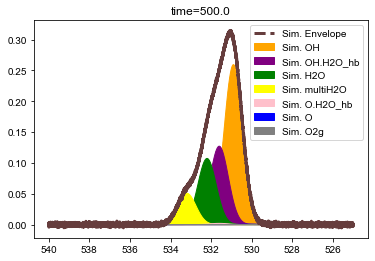

In [4]:
xps.plot(augment=True)

In [5]:
from lblcrn.experiments.storage import CRNStorage
cs = CRNStorage()

In [19]:
cs.store(xps, ts)

In [8]:
cs.load_from_rsys(rsys)[0].xps_data

,envelope,H2O,O,O.H2O_hb,O2g,OH,OH.H2O_hb,multiH2O
525.0,1.376666e-30,3.504014e-57,1.376666e-30,4.669491e-50,3.574038e-119,1.431300e-38,3.024449e-48,5.467575e-74
525.001,1.411012e-30,3.630592e-57,1.411012e-30,4.823883e-50,3.754609e-119,1.473532e-38,3.124449e-48,5.693077e-74
525.002,1.446208e-30,3.761725e-57,1.446208e-30,4.983356e-50,3.944283e-119,1.517002e-38,3.227741e-48,5.927850e-74
525.0029999999999,1.482275e-30,3.897574e-57,1.482275e-30,5.148076e-50,4.143519e-119,1.561747e-38,3.334430e-48,6.172275e-74
525.0039999999999,1.519233e-30,4.038310e-57,1.519233e-30,5.318213e-50,4.352797e-119,1.607804e-38,3.444629e-48,6.426747e-74
...,...,...,...,...,...,...,...,...
539.9949999996454,7.608769e-39,9.887008e-67,9.357700e-111,7.248878e-79,7.608769e-39,7.539075e-90,4.695129e-77,1.938459e-51
539.9959999996454,7.423706e-39,9.514312e-67,8.907835e-111,6.955029e-79,7.423706e-39,7.208546e-90,4.504801e-77,1.874605e-51
539.9969999996454,7.243108e-39,9.155619e-67,8.479555e-111,6.673058e-79,7.243108e-39,6.892475e-90,4.322168e-77,1.812846e-51
539.9979999996453,7.066869e-39,8.810407e-67,8.071827e-111,6.402487e-79,7.066869e-39,6.590230e-90,4.146918e-77,1.753112e-51


In [9]:
cs.load('60343a458e8fef24821a82e8')[0]

TypeError: 'NoneType' object is not subscriptable

In [6]:
cs.find_closest_xps(rsys, xps.df.simulated.envelope).xps_data

2.4153722283348575e-16


,envelope,H2O,O,O.H2O_hb,O2g,OH,OH.H2O_hb,multiH2O
525.0,1.376666e-30,3.504014e-57,1.376666e-30,4.669491e-50,3.574038e-119,1.431300e-38,3.024449e-48,5.467575e-74
525.001,1.411012e-30,3.630592e-57,1.411012e-30,4.823883e-50,3.754609e-119,1.473532e-38,3.124449e-48,5.693077e-74
525.002,1.446208e-30,3.761725e-57,1.446208e-30,4.983356e-50,3.944283e-119,1.517002e-38,3.227741e-48,5.927850e-74
525.0029999999999,1.482275e-30,3.897574e-57,1.482275e-30,5.148076e-50,4.143519e-119,1.561747e-38,3.334430e-48,6.172275e-74
525.0039999999999,1.519233e-30,4.038310e-57,1.519233e-30,5.318213e-50,4.352797e-119,1.607804e-38,3.444629e-48,6.426747e-74
...,...,...,...,...,...,...,...,...
539.9949999996454,7.608769e-39,9.887008e-67,9.357700e-111,7.248878e-79,7.608769e-39,7.539075e-90,4.695129e-77,1.938459e-51
539.9959999996454,7.423706e-39,9.514312e-67,8.907835e-111,6.955029e-79,7.423706e-39,7.208546e-90,4.504801e-77,1.874605e-51
539.9969999996454,7.243108e-39,9.155619e-67,8.479555e-111,6.673058e-79,7.243108e-39,6.892475e-90,4.322168e-77,1.812846e-51
539.9979999996453,7.066869e-39,8.810407e-67,8.071827e-111,6.402487e-79,7.066869e-39,6.590230e-90,4.146918e-77,1.753112e-51
